# Diabetes Onset Detection -- Feature Engineering

## Goal
1. Create some feature interaction between existing variables
2. Normalization of variables
    * Z-score standardization
    * min-max scaling
3. Principal component analysis

### Importing useful packages

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# supress warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_style("whitegrid")

### Load data
Besides loading `diabetes_outliers_clean.csv` from our data cleaning notebook, we will use the `diabetes_mean_X_train.csv`, `diabetes_median_X_train.csv`, `diabetes_mean_X_test.csv` and `diabetes_median_X_test.csv`, this time since we will use them to fit the model in the future

In [52]:
diabetes = pd.read_csv('../Data/diabetes_outliers_clean.csv')

# fill the missing value with mean and median for further use
diabetes.fillna(diabetes.mean(), inplace=True)


diabetes_mean_X_train = pd.read_csv('../Data/diabetes_mean_X_train.csv')
diabetes_median_X_train = pd.read_csv('../Data/diabetes_median_X_train.csv')
diabetes_mean_X_test = pd.read_csv('../Data/diabetes_mean_X_test.csv')
diabetes_median_X_test = pd.read_csv('../Data/diabetes_median_X_test.csv')

### Feature interaction
In this notebook, our first goal is to create some features that reflect some interactions between variables, this creates a new feature that potentially pick up some information from the data that does not exist before and might as well improve our modeling fitting and prediction power in the future

From our exploratory data analysis step, we can see there are some correlation between variables, we first do a quick pairplot that shows the distribution and correlation between each variable, we will include `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI`

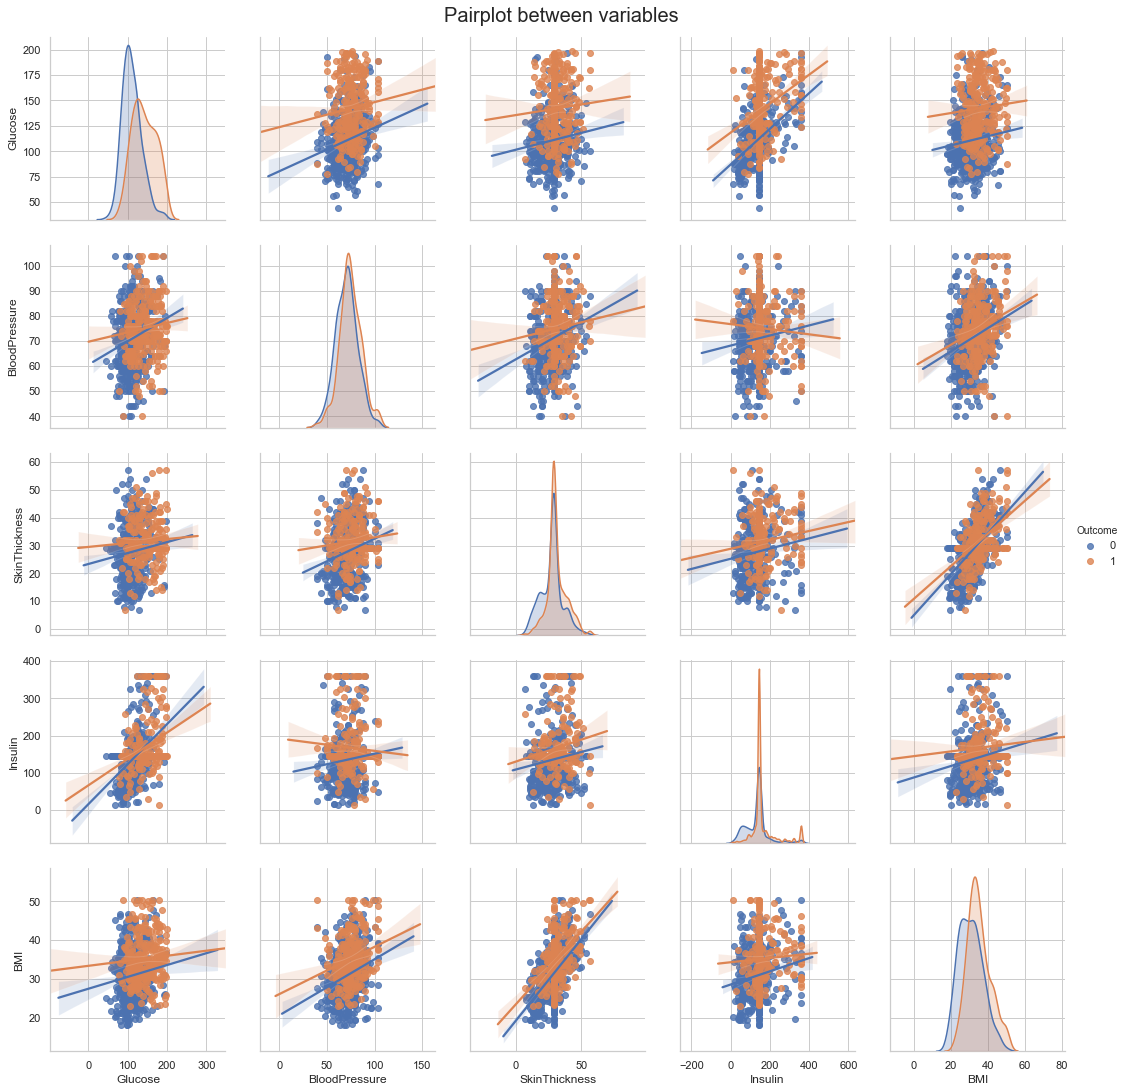

In [53]:
# plot the seaborn pairplot
var = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
g = sns.pairplot(diabetes, hue='Outcome', vars=var, height=3, kind='reg')
g.fig.suptitle('Pairplot between variables', size=20, y=1.01)
plt.show()

From the graph above, we separated the diabetic and non-diabetic groups to see the correlation between each variables, some of the variables we did not include since they are more or less discrete rather than continuous. We can see there are some pair that has opposite correlation between diabetic and non-diabetic groups, for example, `Insulin` vs `BloodPressure`, we also observed that the correlation of `SkinThickness` vs `BloodPressure`, `BloodPressure` vs `Glucose` and `BMI` vs `Insulin` are quite different between diabetic and non-diabetic groups

#### Create feature interaction
Based on what we have observed, we will create new features from those four pairs we mentioned above, since those seems to act differently between diabetic and non-diabetic groups, the interaction between those pairs might create more information for our model, the interaction we will be using is basically multiply the feature together and create new variables

We will only do it on the training and testing set since they will be the one we are going to use in the model fitting

In [54]:
data_all = [diabetes_mean_X_train, diabetes_median_X_train, diabetes_mean_X_test, diabetes_median_X_test]

# insulin-bloodpressure
for data in data_all:
    data['Insulin_bloodpressure'] = data['Insulin'] * data['BloodPressure']

# skinthickness-bloodpressure
for data in data_all:
    data['Skinthickness_bloodpressure'] = data['SkinThickness'] * data['BloodPressure']


# glucose-bloodpressure
for data in data_all:
    data['Glucose_bloodpressure'] = data['Glucose'] * data['BloodPressure']

# BMI-insulin
for data in data_all:
    data['BMI_insulin'] = data['BMI'] * data['Insulin']

In [55]:
# check our newly created features
diabetes_mean_X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_bloodpressure,Skinthickness_bloodpressure,Glucose_bloodpressure,BMI_insulin
0,5.0,77.0,82.000000,41.000000,42.000000,35.8,0.156,35.0,3444.000000,3362.000000,6314.000000,1503.600000
1,11.0,138.0,74.000000,26.000000,144.000000,36.1,0.557,50.0,10656.000000,1924.000000,10212.000000,5198.400000
2,8.0,120.0,72.019685,29.307278,149.590455,30.0,0.183,38.0,10773.457421,2110.700904,8642.362205,4487.713636
3,3.0,106.0,72.000000,29.307278,149.590455,25.8,0.207,27.0,10770.512727,2110.123989,7632.000000,3859.433727
4,10.0,133.0,68.000000,29.307278,149.590455,27.0,0.245,36.0,10172.150909,1992.894879,9044.000000,4038.942273


### Standardization of variables
Since our variables in the dataset have different scales, it is important for us to normalize each column to have them under the same scale, without the normalization steps, the machine learning model may take forever to come up with a good fitting, we will try two different methods of normalization, the z-score method and the min-max method

#### Z-score normalization
This method basically calculates the mean and standard deviation of each variable and substract the mean and divide by the standard deviation of that particular variable, this will make each vairable of mean = 0 and standard deviation = 1, we will import the package from sklearn to help with normalization

In [56]:
diabetes_median_X_train.shape

(537, 12)

In [57]:
diabetes_median_X_test.shape

(231, 12)

In [58]:
# import packages from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we will fit_transform the training set and do the transform only on the test set since we do not know the mean 
# and standard deviation of the new data(test set)
col = diabetes_mean_X_train.columns

diabetes_mean_X_train_z = diabetes_mean_X_train.copy()
diabetes_mean_X_test_z = diabetes_mean_X_test.copy()
diabetes_median_X_train_z = diabetes_median_X_train.copy()
diabetes_median_X_test_z = diabetes_median_X_test.copy()


diabetes_mean_X_train_z[col] = scaler.fit_transform(diabetes_mean_X_train_z[col])
diabetes_mean_X_test_z[col] = scaler.transform(diabetes_mean_X_test_z[col])

diabetes_median_X_train_z[col] = scaler.fit_transform(diabetes_median_X_train_z[col])
diabetes_median_X_test_z[col] = scaler.transform(diabetes_median_X_test_z[col])

In [59]:
# check the result of train set
diabetes_mean_X_train.describe().loc[['mean','std']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_bloodpressure,Skinthickness_bloodpressure,Glucose_bloodpressure,BMI_insulin
mean,3.848231,122.855535,72.019685,29.307278,149.590455,32.504991,0.456138,33.265363,10799.404416,2129.494928,8908.816375,4935.247090
std,3.328524,30.320117,11.614919,8.436215,63.579003,6.643037,0.283346,11.682198,4870.916928,757.714206,2830.527119,2504.758538


In [60]:
# check the result of test set
diabetes_mean_X_test.describe().loc[['mean','std']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_bloodpressure,Skinthickness_bloodpressure,Glucose_bloodpressure,BMI_insulin
mean,3.811688,118.995046,73.147697,28.726164,144.319290,32.143615,0.465368,33.047619,10721.967442,2126.062230,8825.618783,4737.562451
std,3.387354,30.599649,11.873743,8.451508,67.201913,6.731628,0.291279,11.526147,5638.486200,774.275434,3107.970926,2767.458077


We can see from the table above that the mean of training set is close to 0 and the standard deviation is close to 1, it is not the same case in test set however, since we use the mean and std from the training set to transform our testing set. Next we will try another transformation: min-max

#### min-max scaling
Min-max scaling is basically calculating the range(max - min) of each variable and substract the min by every value and divide by the range, so the minimum of the each variable will be 0, the maximum will be 1, again, we will import the sklearn package to help us with the scaling process

In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

diabetes_mean_X_train_min_max = diabetes_mean_X_train.copy()
diabetes_mean_X_test_min_max = diabetes_mean_X_test.copy()
diabetes_median_X_train_min_max = diabetes_median_X_train.copy()
diabetes_median_X_test_min_max = diabetes_median_X_test.copy()

diabetes_mean_X_train_min_max[col] = min_max.fit_transform(diabetes_mean_X_train_min_max[col])
diabetes_mean_X_test_min_max[col] = min_max.transform(diabetes_mean_X_test_min_max[col])

diabetes_median_X_train_min_max[col] = min_max.fit_transform(diabetes_median_X_train_min_max[col])
diabetes_median_X_test_min_max[col] = min_max.transform(diabetes_median_X_test_min_max[col])

In [62]:
# check the result of train set
diabetes_mean_X_train_min_max.describe().loc[['min','max','mean','std']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_bloodpressure,Skinthickness_bloodpressure,Glucose_bloodpressure,BMI_insulin
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.285054,0.444201,0.500308,0.446146,0.389412,0.446334,0.337021,0.269568,0.344587,0.370034,0.382639,0.283247
std,0.246557,0.221315,0.181483,0.168724,0.183954,0.207271,0.252537,0.256752,0.170066,0.165368,0.196893,0.153108


In [63]:
# check the result of train set
diabetes_mean_X_test_min_max.describe().loc[['min','max','mean','std']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_bloodpressure,Skinthickness_bloodpressure,Glucose_bloodpressure,BMI_insulin
min,0.000000,-0.131387,0.000000,0.020000,-0.002893,0.000000,0.006239,0.000000,-0.000070,0.010039,-0.047301,0.009346
max,1.000000,0.992701,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.100729,0.949367,1.130217,1.089278
mean,0.282347,0.416022,0.517933,0.434523,0.374161,0.435058,0.345248,0.264783,0.341883,0.369285,0.376852,0.271163
std,0.250915,0.223355,0.185527,0.169030,0.194436,0.210035,0.259607,0.253322,0.196866,0.168982,0.216192,0.169166


### Principal component analysis (PCA)
PCA is a dimension reduction method that converts the original correlated variables into a set of values that are linearly uncorrelated (orthogonal transformation), this method could retained the most of variances in each variables depends on how many components we include. The major advantage of PCA is the reduction of noise and get rid of the redundancy of data, we will use the PCA to extract the components of five features chosen: `Glucose`, `BloodPressure`, `SkindThickness`, `Insulin` and `BMI`, these five features are selected based on relatively stronger correlation between each other from the EDA we did previously

We will import sklearn PCA package to generate the components, one thing to note that PCA is really sensitive to the scale, thus we need to normalize the data first, we will use the processed data we genearated previously

In [64]:
# import sklearn package
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# create PCA on all the data
data_all = [(diabetes_mean_X_train_z, diabetes_mean_X_test_z),
            (diabetes_median_X_train_z, diabetes_median_X_test_z),
            (diabetes_mean_X_train_min_max, diabetes_mean_X_test_min_max),
            (diabetes_median_X_train_min_max, diabetes_median_X_test_min_max)]

for data in data_all:
    component_train = pca.fit_transform(data[0])
    component_test = pca.transform(data[1])
    
    # attached two new columns to the data
    data[0]['PCA1'] = component_train[:,0]
    data[0]['PCA2'] = component_train[:,1]
    data[1]['PCA1'] = component_test[:,0]
    data[1]['PCA2'] = component_test[:,1]

In the future model fitting, we will test the model using both data with and without PCA

In [65]:
keep = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'PCA1', 'PCA2']

diabetes_mean_X_train_z_PCA = diabetes_mean_X_train_z[keep].copy()
diabetes_mean_X_test_z_PCA = diabetes_mean_X_test_z[keep].copy()
diabetes_median_X_train_z_PCA = diabetes_median_X_train_z[keep].copy()
diabetes_median_X_test_z_PCA = diabetes_median_X_test_z[keep].copy()
diabetes_mean_X_train_min_max_PCA = diabetes_mean_X_train_min_max[keep].copy()
diabetes_mean_X_test_min_max_PCA = diabetes_mean_X_test_min_max[keep].copy()
diabetes_median_X_train_min_max_PCA = diabetes_median_X_train_min_max[keep].copy()
diabetes_median_X_test_min_max_PCA = diabetes_median_X_test_min_max[keep].copy()

In [66]:
# drop the pca components from the original data
for data in data_all:
    data[0].drop(['PCA1', 'PCA2'], inplace=True, axis=1)
    data[1].drop(['PCA1', 'PCA2'], inplace=True, axis=1)

We will export the data and we are finally ready for the model fitting

In [67]:
diabetes_mean_X_train_z.to_csv('../Data/diabetes_mean_X_train_z.csv', index=False)
diabetes_mean_X_test_z.to_csv('../Data/diabetes_mean_X_test_z.csv', index=False)
diabetes_median_X_train_z.to_csv('../Data/diabetes_median_X_train_z.csv', index=False)
diabetes_median_X_train_z.to_csv('../Data/diabetes_median_X_test_z.csv', index=False)

diabetes_mean_X_train_min_max.to_csv('../Data/diabetes_mean_X_train_min_max.csv', index=False)
diabetes_mean_X_test_min_max.to_csv('../Data/diabetes_mean_X_test_min_max.csv', index=False)
diabetes_median_X_train_min_max.to_csv('../Data/diabetes_median_X_train_min_max.csv', index=False)
diabetes_median_X_train_min_max.to_csv('../Data/diabetes_median_X_test_min_max.csv', index=False)

diabetes_mean_X_train_z_PCA.to_csv('../Data/diabetes_mean_X_train_z_PCA.csv', index=False)
diabetes_median_X_train_z_PCA.to_csv('../Data/diabetes_median_X_train_z_PCA.csv', index=False)
diabetes_mean_X_train_min_max_PCA.to_csv('../Data/diabetes_mean_X_train_min_max_PCA.csv', index=False)
diabetes_median_X_train_min_max_PCA.to_csv('../Data/diabetes_median_X_train_min_max_PCA.csv', index=False)
diabetes_mean_X_test_z_PCA.to_csv('../Data/diabetes_mean_X_test_z_PCA.csv', index=False)
diabetes_median_X_test_z_PCA.to_csv('../Data/diabetes_median_X_test_z_PCA.csv', index=False)
diabetes_mean_X_test_min_max_PCA.to_csv('../Data/diabetes_mean_X_test_min_max_PCA.csv', index=False)
diabetes_median_X_test_min_max_PCA.to_csv('../Data/diabetes_median_X_test_min_max_PCA.csv', index=False)